# Outages of different elements

In [16]:
import resiliencyTool as rt
import pandas as pd
# import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandapower.plotting.plotly import simple_plotly, vlevel_plotly, pf_res_plotly
from utils import * # pplotting functions
import warnings
warnings.simplefilter("ignore") # warning are ignored for now

## No outages

In [17]:
simulationName = 'elements_outages_v0'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3]) # read database with results
df = filter(df, iteration = 0)

### Dispatch

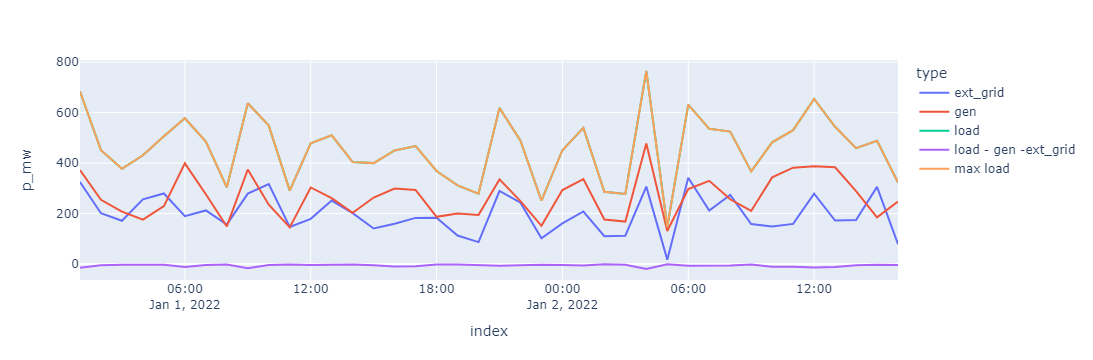

In [18]:
df_aux = group_by(filter(df, type = ['load', 'gen', 'ext_grid']), 'sum', 'field', 'type')
net = df_aux.loc['p_mw','load']-df_aux.loc['p_mw','gen']-df_aux.loc['p_mw','ext_grid']
max_load = df_aux.loc['max_p_mw', 'load']

df_aux = invert(df_aux)
fig = px.line(df_aux, x=df_aux.index, y = 'p_mw', color = 'type')
fig.add_scatter(x=net.index, y=net, mode='lines', name = 'load - gen -ext_grid')
fig.add_scatter(x=max_load.index, y=max_load, mode='lines', name = 'max load')

## Transformer down

Transformer *TR1* out of service

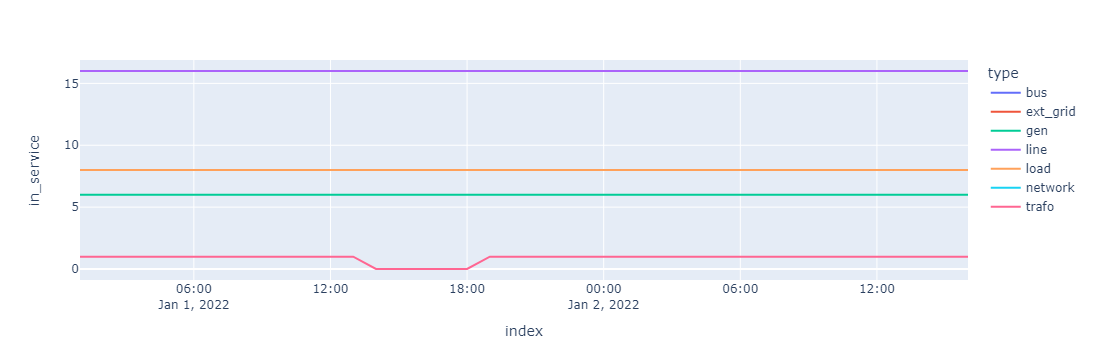

In [19]:
simulationName = 'elements_outages_v1'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3]) # read database with results
df = filter(df, iteration = 0)
df_types = group_by(df, 'sum', 'field' , 'type')
df_types = invert(df_types)
px.line(df_types, x=df_types.index, y = 'in_service', color = 'type')

start= 1, stop= 41
start= 12, stop= 17
start= 16, stop= 17
Iteration = 0
in_service
in_service
max_p_mw


  0%|                                                                                                                                                                                                                  | 0/1 [00:00<?, ?it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
PowerModels.jl does not consider reactive power cost - costs are ignored
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.22it/s]


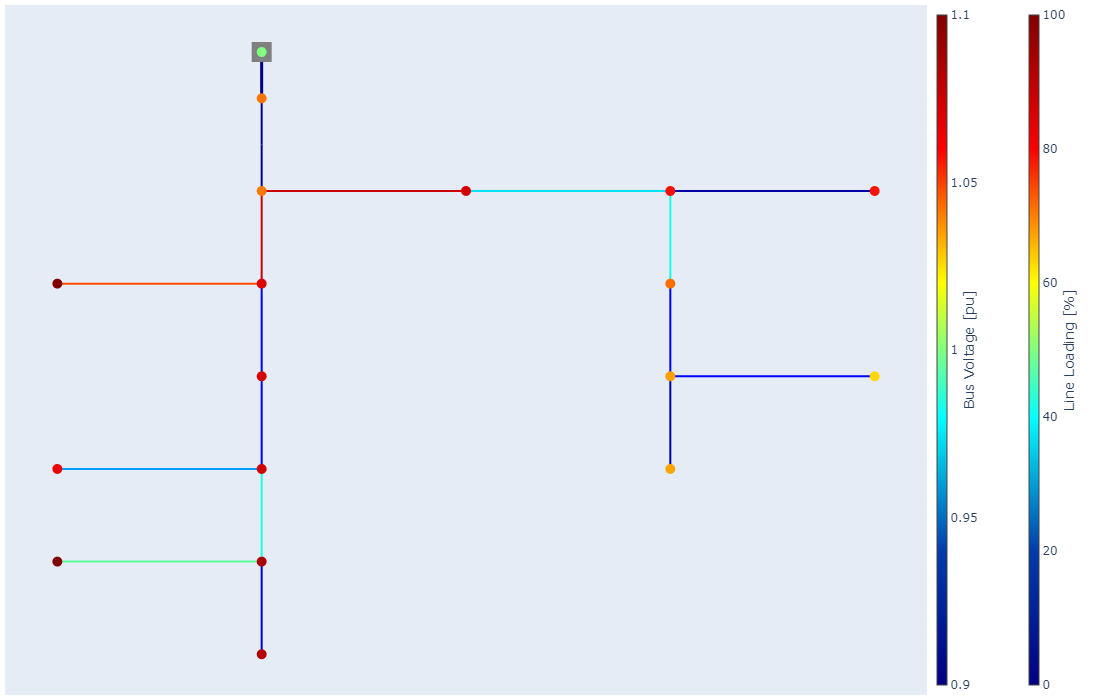

In [20]:
network = rt.network.Network(simulationName)
simulation = rt.simulation.Sim(simulationName)
time = rt.simulation.Time(start = 16, duration = 1)
simulation.run(network, iterationSet = [0], time = time, run_type = 'pm_ac_opf', delta = 1e-16, saveOutput = False)
pf_res_plotly(network.pp_network);

### Dispatch

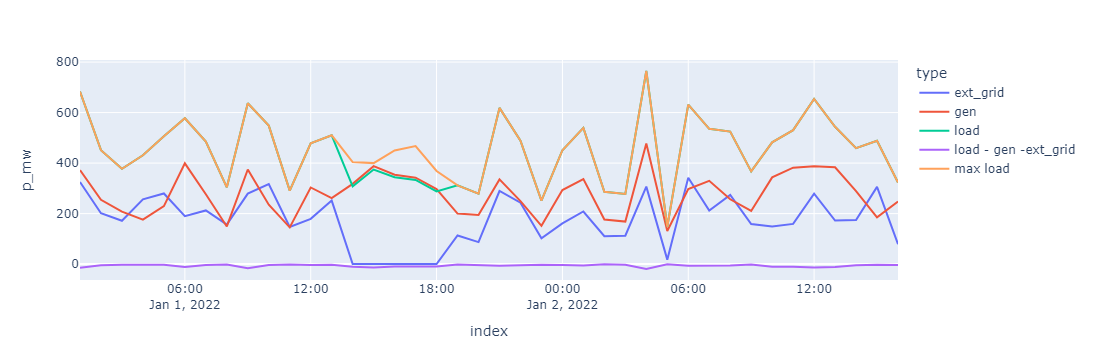

In [21]:
df_aux = group_by(filter(df, type = ['load', 'gen', 'ext_grid']), 'sum', 'field', 'type')
net = df_aux.loc['p_mw','load']-df_aux.loc['p_mw','gen']-df_aux.loc['p_mw','ext_grid']
max_load = df_aux.loc['max_p_mw', 'load']
df_aux = invert(df_aux)
fig = px.line(df_aux, x=df_aux.index, y = 'p_mw', color = 'type')
fig.add_scatter(x=net.index, y=net, mode='lines', name = 'load - gen -ext_grid')
fig.add_scatter(x=max_load.index, y=max_load, mode='lines', name = 'max load')
# fig.add_trace(px.line(x=net.index, y=net))

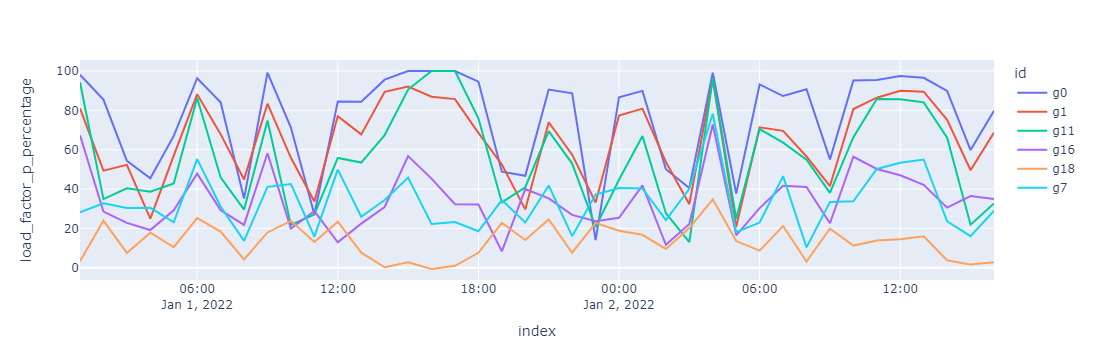

In [22]:
simulationName = 'elements_outages_v1'
df_gen =  group_by(filter(df, type = 'gen'), 'sum', 'field','id')
# df_gen = invert(df_gen)
# px.line(df_gen, x = df_gen.index, y = 'p_mw', color = 'id')
df_load_factor_percentage= invert(df_gen.loc['p_mw']/df_gen.loc['max_p_mw']*100)
px.line(df_load_factor_percentage, color = 'id', labels={'value':'load_factor_p_percentage'})

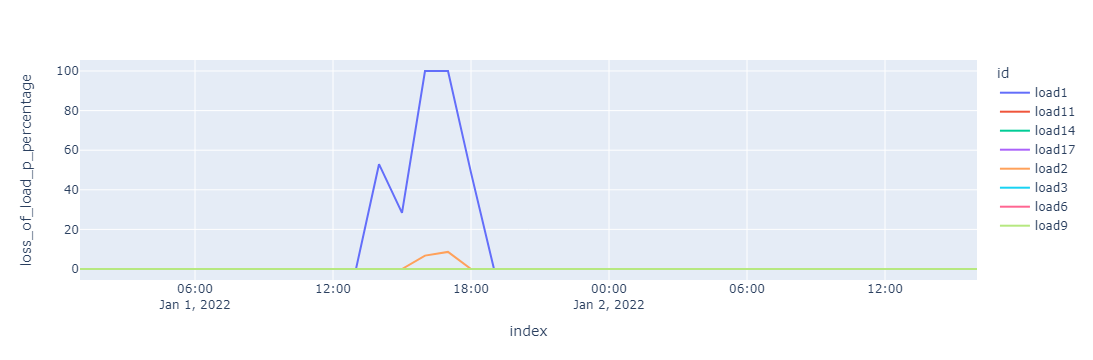

In [23]:
df_load =  invert(group_by(filter(df, type = 'load'), 'sum', 'field','id'))
px.line(df_load, x = df_load.index, y = 'loss_of_load_p_percentage', color = 'id')

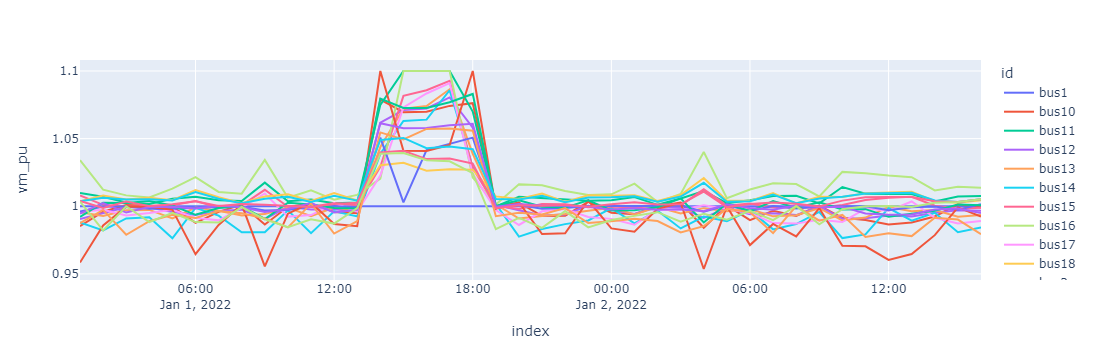

In [24]:
df_bus =  invert(group_by(filter(df, type = 'bus'), 'sum', 'field','id'))
px.line(df_bus, x = df_bus.index, y = 'vm_pu', color = 'id')

## Transformer  + Generator down

Transformer *TR1* and generator *g18* out of service simulatenously

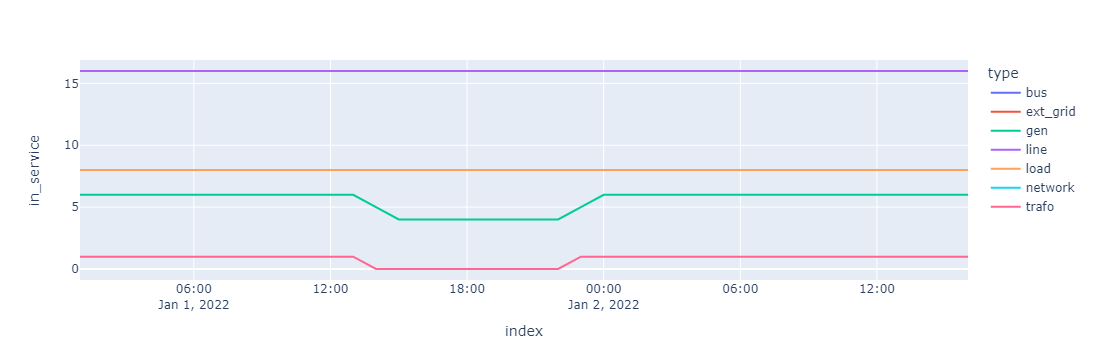

In [25]:
simulationName = 'elements_outages_v2'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3]) # read database with results
df = filter(df, iteration = 0)
df_types = group_by(df, 'sum', 'field' , 'type')
df_types = invert(df_types)
px.line(df_types, x=df_types.index, y = 'in_service', color = 'type')

### Dispatch

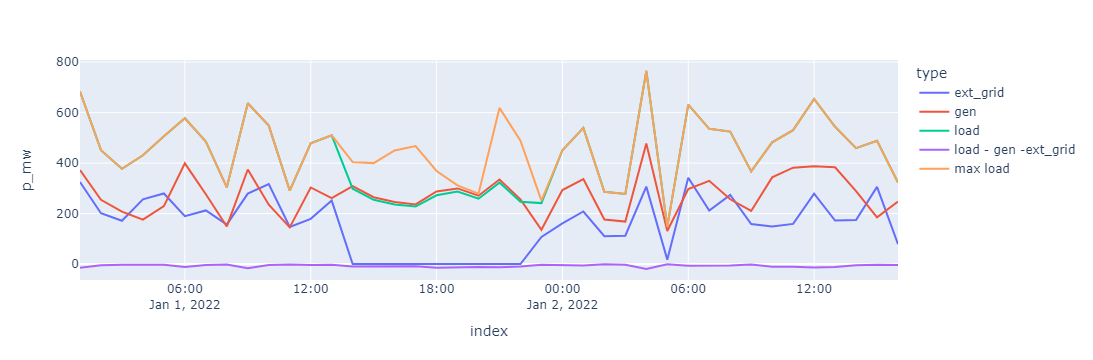

In [26]:
df_aux = group_by(filter(df, type = ['load', 'gen', 'ext_grid']), 'sum', 'field', 'type')
net = df_aux.loc['p_mw','load']-df_aux.loc['p_mw','gen']-df_aux.loc['p_mw','ext_grid']
max_load = df_aux.loc['max_p_mw', 'load']
df_aux = invert(df_aux)
fig = px.line(df_aux, x=df_aux.index, y = 'p_mw', color = 'type')
fig.add_scatter(x=net.index, y=net, mode='lines', name = 'load - gen -ext_grid')
fig.add_scatter(x=max_load.index, y=max_load, mode='lines', name = 'max load')

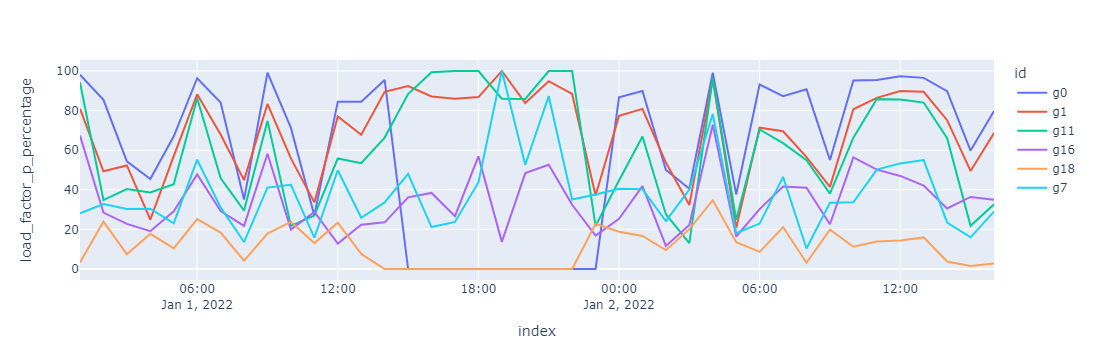

In [27]:
df_gen =  group_by(filter(df, type = 'gen'), 'sum', 'field','id')
# df_gen = invert(df_gen)
# px.line(df_gen, x = df_gen.index, y = 'p_mw', color = 'id')
df_load_factor_percentage= invert(df_gen.loc['p_mw']/df_gen.loc['max_p_mw']*100)
px.line(df_load_factor_percentage, color = 'id', labels={'value':'load_factor_p_percentage'})

## Load down

Load *load1* out of service

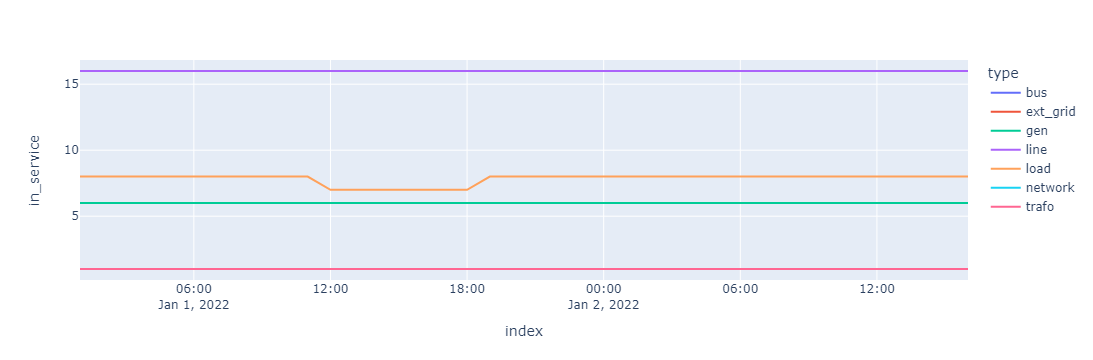

In [28]:
simulationName = 'elements_outages_v3'
df = pd.read_csv(rt.config.path.engineDatabaseFile(simulationName), index_col = [0, 1, 2, 3])
df = filter(df, iteration = 0)
df_types = group_by(df, 'sum', 'field' , 'type')
df_types = invert(df_types)
px.line(df_types, x=df_types.index, y = 'in_service', color = 'type')

### Dispatch

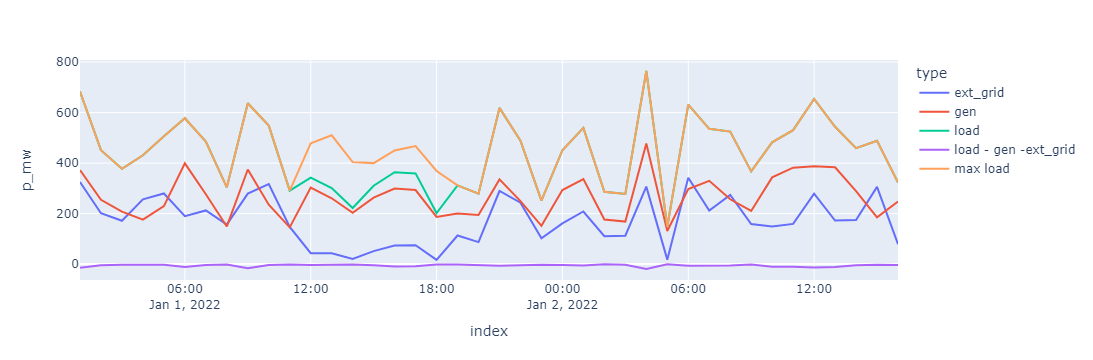

In [29]:
df_aux = group_by(filter(df, type = ['load', 'gen', 'ext_grid']), 'sum', 'field', 'type')
net = df_aux.loc['p_mw','load']-df_aux.loc['p_mw','gen']-df_aux.loc['p_mw','ext_grid']
max_load = df_aux.loc['max_p_mw', 'load']
df_aux = invert(df_aux)
fig = px.line(df_aux, x=df_aux.index, y = 'p_mw', color = 'type')
fig.add_scatter(x=net.index, y=net, mode='lines', name = 'load - gen -ext_grid')
fig.add_scatter(x=max_load.index, y=max_load, mode='lines', name = 'max load')
# fig.add_trace(px.line(x=net.index, y=net))

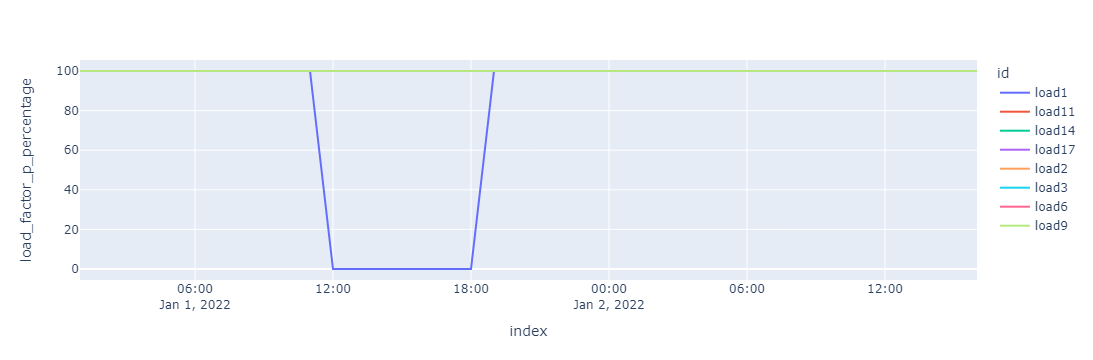

In [30]:
df_load =  group_by(filter(df, type = 'load'), 'sum', 'field','id')
# df_gen = invert(df_gen)
# px.line(df_gen, x = df_gen.index, y = 'p_mw', color = 'id')
df_load_factor_percentage= invert(df_load.loc['p_mw']/df_load.loc['max_p_mw']*100)
px.line(df_load_factor_percentage, color = 'id', labels={'value':'load_factor_p_percentage'})